In [1]:
import pandas as pd

In [2]:
elec = pd.read_csv('conso-elec.csv', encoding='utf_8', sep=';')
pd.set_option('max_columns', None)

In [3]:
elec.tail(5)

,Opérateur,Année,Filière,Consommation Agriculture (MWh),Nombre de points Agriculture,Nombre de mailles secretisées (agriculture),Indique qualité Agriculture,Consommation Industrie (MWh),Nombre de points Industrie,Nombre de mailles secretisées (industrie),Indice qualité Industrie,Consommation Tertiaire (MWh),Nombre de points Tertiaire,Nombre de mailles secretisées (tertiaire),Indice qualité Tertiaire,Consommation Résidentiel (MWh),Nombre de points Résidentiel,Nombre de mailles secretisées (résidentiel),Indice qualité Résidentiel,Thermosensibilité (MWh/degré-jour),Part Thermosensible,Consommation Secteur Inconnu (MWh),Nombre de points Secteur Inconnu,Nombre de mailles secretisées (secteur inconnu),Indice qualité Non Affecté,Code Commune,Libellé Commune,Code EPCI,Libellé EPCI,Code Département,Libellé Département,Code Région,Libellé Région,id_filiere,consototale
355594,Enedis,2012,Electricité,0.0,0,0,0.0,4206.95,5,0,0.997,1776.89,10,0,0.932,6399.65,1147,0,0.355,0.0,0.0,0.0,0,0,0.0,71192,Étang-sur-Arroux,200070530,CC du Grand Autunois Morvan,71,Saône-et-Loire,27,Bourgogne-Franche-Comté,100,12383.49
355595,Enedis,2012,Electricité,0.0,0,0,0.0,0.00,0,0,0.000,0.00,0,0,0.000,1062.82,172,0,0.335,0.0,0.0,0.0,0,0,0.0,71207,Fretterans,247100647,CC Bresse Nord Intercom,71,Saône-et-Loire,27,Bourgogne-Franche-Comté,100,1062.82
355596,Enedis,2012,Electricité,0.0,0,0,0.0,0.00,0,0,0.000,0.00,0,0,0.000,539.14,81,0,0.322,0.0,0.0,0.0,0,0,0.0,71217,Germolles-sur-Grosne,200071645,CC Saint Cyr Mère Boitier entre Charolais et M...,71,Saône-et-Loire,27,Bourgogne-Franche-Comté,100,539.14
355597,Enedis,2012,Electricité,0.0,0,0,0.0,0.00,0,0,0.000,907.92,1,0,0.861,3615.11,448,0,0.337,0.0,0.0,0.0,0,0,0.0,71222,Gourdon,247100290,CU Le Creusot Montceau-les-Mines,71,Saône-et-Loire,27,Bourgogne-Franche-Comté,100,4523.03
355598,Enedis,2012,Electricité,0.0,0,0,0.0,0.00,0,0,0.000,0.00,0,0,0.000,2531.95,434,0,0.316,0.0,0.0,0.0,0,0,0.0,71223,La Grande-Verrière,200070530,CC du Grand Autunois Morvan,71,Saône-et-Loire,27,Bourgogne-Franche-Comté,100,2531.95


In [4]:
conso_secteur = elec.filter(like='Consommation', axis=1).astype(int)

In [5]:
secteurs = [nom_colonne for nom_colonne in conso_secteur.columns]
totaux = []
for colonne in conso_secteur:
    total_secteur = conso_secteur[colonne].sum()
    totaux.append(total_secteur)

In [6]:
import matplotlib.pyplot as plt

In [12]:
par_secteur = dict(zip())

NameError: name 'cm' is not defined

In [12]:
par_an = elec.groupby('Année').sum()

In [13]:
par_an.reset_index(inplace=True)

In [14]:
par_an.head(8)

,Année,Consommation Agriculture (MWh),Nombre de points Agriculture,Nombre de mailles secretisées (agriculture),Indique qualité Agriculture,Consommation Industrie (MWh),Nombre de points Industrie,Nombre de mailles secretisées (industrie),Indice qualité Industrie,Consommation Tertiaire (MWh),Nombre de points Tertiaire,Nombre de mailles secretisées (tertiaire),Indice qualité Tertiaire,Consommation Résidentiel (MWh),Nombre de points Résidentiel,Nombre de mailles secretisées (résidentiel),Indice qualité Résidentiel,Thermosensibilité (MWh/degré-jour),Part Thermosensible,Consommation Secteur Inconnu (MWh),Nombre de points Secteur Inconnu,Nombre de mailles secretisées (secteur inconnu),Indice qualité Non Affecté,Code Région,id_filiere,consototale
0,2011,5.738158e+06,28363,0,9989.78400,2.945364e+08,92615,0,17997.74140,1.467559e+08,408599,0,23312.86352,3.548323e+08,45845579,1015,10739.127612,0.000000,0.0000,4.359436e+06,31746,822,2460.41974,2203617,5295900,8.062223e+08
1,2012,5.921098e+06,28559,0,10045.43780,3.350578e+08,97290,0,18735.42588,1.682535e+08,419248,0,24445.16380,3.880893e+08,46328027,1010,12072.838400,0.000000,0.0000,1.274274e+07,34012,339,2516.47841,2294917,5456100,9.100644e+08
2,2013,6.073610e+06,29364,0,10291.32104,3.315504e+08,102727,0,19118.21920,1.742598e+08,433615,0,24868.74940,4.062655e+08,47210147,1050,14604.725000,0.000000,0.0000,1.327460e+07,34414,393,2556.59279,2320666,5528400,9.314238e+08
3,2014,5.421901e+06,29567,0,10337.27930,3.109478e+08,103231,0,19140.74550,1.575760e+08,435961,0,24900.30610,3.529115e+08,47479980,1152,14560.515860,0.000000,0.0000,1.257958e+07,42653,598,2603.86484,2321720,5532100,8.394368e+08
4,2015,5.934180e+06,31423,0,10970.05000,3.290269e+08,124610,0,19917.82700,1.648724e+08,480234,0,26034.06783,3.686435e+08,49010879,1289,15634.606215,0.000000,0.0000,1.495593e+07,1384068,621,4212.46015,2414574,5737700,8.834329e+08
5,2016,6.154930e+06,31870,0,11189.90590,3.563304e+08,122268,0,19244.26466,1.673410e+08,492868,0,26005.12350,3.879362e+08,49458474,2064,16171.256638,0.000000,0.0000,1.610647e+07,1146974,617,3911.85749,2417932,5754800,9.338689e+08
6,2017,6.309400e+06,37074,0,11781.45100,3.641539e+08,120644,1,20316.52900,1.709879e+08,576237,0,26713.48800,3.819195e+08,50877096,1956,16962.449774,73746.299000,5570.0076,8.952402e+06,93630,572,2749.60397,2421594,5758300,9.323231e+08
7,2018,7.258663e+06,274107,17210,12224.61440,2.870973e+08,288314,20011,12846.57491,1.556918e+08,3468293,9077,15231.20361,1.667955e+08,35354669,1294,16213.376310,23301.787062,296264.5500,9.831313e+06,1032822,17382,8218.44371,1964855,3866800,6.266746e+08


In [15]:
annees = [ligne for ligne in par_an['Année']]
totaux_annee = [total for total in par_an['consototale'].astype(int) / 10**6]

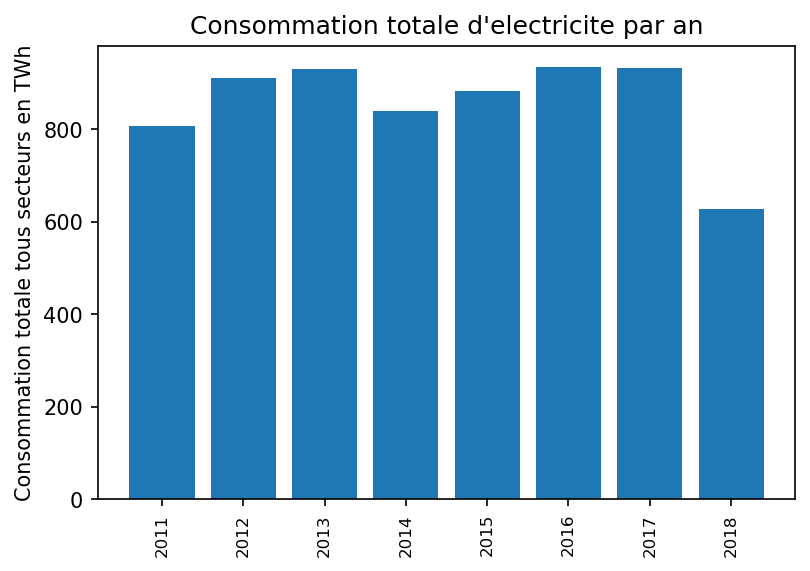

In [16]:
plt.figure(dpi=150)
plt.bar(annees, totaux_annee)
plt.xticks(annees, rotation='90', fontsize=8)
plt.ylabel('Consommation totale tous secteurs en TWh')
plt.title('Consommation totale d\'electricite par an')
plt.show()

In [17]:
par_an_et_secteur = par_an.filter(like='Consommation', axis=1)

In [18]:
par_an_et_secteur['Annee'] = list(map(str, annees))

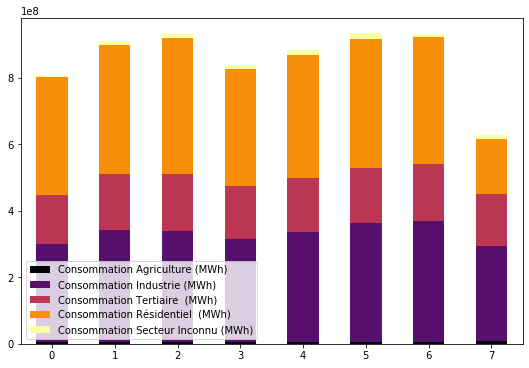

In [19]:
par_an_et_secteur.plot(kind='bar', stacked=True, figsize=(9,6), rot=0, colormap='inferno')